# 3章 メタヒューリスティクス: 統計モデルを使わない最適化手法
どのように屋根を置くか、ではなくどのように頂点を目指すか  
モデルを最初に仮定しないで、最適化する手法 => メタヒューシスティクス  
  
ある問題を解くのが難しい時に、経験的に良いとされている最適化手法 => ヒューリスティクス  
ヒューリスティクスは問題によって異なる  
どんな問題にも適用できるようなヒューリスティクス => メタヒューリスティクス  

- メタヒューリスティクス手法
  - 山登り法
    - 乱沢山登り法
  - 焼きなまし法
  - 遺伝的アルゴリズム

# 山登り法
自分の現在位置を定義して、現在位置より高い柱に飛び乗っていくような方法  


画像A,B,C => x1 = 0,1,2  
ボタンA,B,C => x2 = 0,1,2  
の場合  

変数x1,x2の組み合わせ => 解空間  
x1,x2が(0,1,2)の範囲内に入っている => 実行可能解  
  
ある解を何らかの指標を評価した値 => 評価値  
指標 => 評価関数(クリック率)  
解空間内で評価値を最大にする解 => 最適解

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

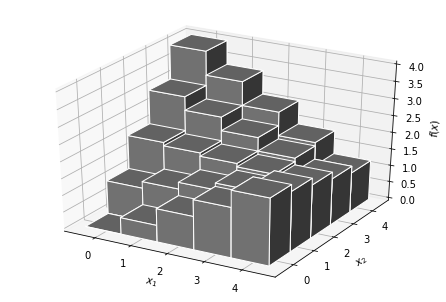

In [7]:
# 評価関数 f(x) = 0.5x_1 + x_2 - 0.3x_1x_2

fig = plt.figure()
ax = Axes3D(fig)

size = 5
_x1, _x2 = np.meshgrid(np.arange(size), np.arange(size))
x1,x2 = _x1.ravel(), _x2.ravel()

f = lambda x1,x2: 0.5*x1 + x2 - 0.3*x1*x2
ax.bar3d(x1,x2,0,1,1,f(x1,x2),color='gray',edgecolor='white',shade=True)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x)$')
plt.xticks(np.arange(0.5,size,1), range(size))
plt.yticks(np.arange(0.5,size,1), range(size))
plt.show()

この評価関数は交互作用が含まれているから平な形状ではなく、二つ山がある  
この評価関数では(0,4)が最適解

In [9]:
def is_valid(x):
  """実行可能解であることを確認する。"""
  return all(-1 < i < size for i in list(x))

class HillClimbing:
  """山登り法

  Args:
    init_x: 初期解
    init_f: 初期解の評価値

  Attributes:
    current_x: 現状解
    current_f: 現状解の評価値
  """

  def __init__(self, init_x, init_f):
    self.current_x = init_x
    self.current_f = init_f

  def get_neighbors(self):
    """近傍解を出力する。

    Returns:
      近傍解のリスト
    """
    neighbor_xs = []
    for i, xi in enumerate(self.current_x):
      neighbor_x = list(self.current_x)
      neighbor_x[i] += 1
      if is_valid(neighbor_x):
        neighbor_xs.append(tuple(neighbor_x))

      neighbor_x = list(self.current_x)
      neighbor_x[i] -= 1
      if is_valid(neighbor_x):
        neighbor_xs.append(tuple(neighbor_x))
    return neighbor_xs

  def update(self, neighbor_xs, neighbor_fs):
    """良い近傍解があれば現状解を更新する。

    Args:
      neighbor_xs: 評価済みの近傍解のリスト
      neighbor_fs: 近傍解の評価値のリスト

    Returns:
      更新前の現状解と更新後の現状解のタプル
    """
    old_x = self.current_x
    if max(neighbor_fs) > self.current_f:
      self.current_x = neighbor_xs[
          neighbor_fs.index(max(neighbor_fs))]
      self.current_f = max(neighbor_fs)
    return (old_x, self.current_x)

In [10]:
init_x = (0, 0)
init_f = f(init_x[0], init_x[1])
hc = HillClimbing(init_x, init_f)

evaluated_xs = {init_x}
steps = []

for _ in range(6):
  neighbor_xs = hc.get_neighbors()
  neighbor_fs = [f(x[0], x[1]) for x in neighbor_xs]
  step = hc.update(neighbor_xs, neighbor_fs)

  print('%s -> %s' % (step))
  steps.append(step)
  evaluated_xs.update(neighbor_xs)

(0, 0) -> (0, 1)
(0, 1) -> (0, 2)
(0, 2) -> (0, 3)
(0, 3) -> (0, 4)
(0, 4) -> (0, 4)
(0, 4) -> (0, 4)


4回の更新で最適解にたどり着いている

In [13]:
import matplotlib.ticker as ticker

def visualize_path(evaluated_xs, steps):
  fig, ax = plt.subplots(figsize=(5, 5))
  ax.set_xlim(-.5, size -.5)
  ax.set_ylim(-.5, size -.5)

  for i in range(size):
    for j in range(size):
      if (i, j) in evaluated_xs:
        ax.text(i, j, '%.1f'%(f(i, j)), ha='center', va='center',
                bbox=dict(edgecolor='gray', facecolor='none',
                          linewidth=2))
      else:
        ax.text(i, j, '%.1f'%(f(i, j)), ha='center', va='center')

  ax.set_xlabel('$x_1$')
  ax.set_ylabel('$x_2$')
  ax.xaxis.set_minor_locator(
      ticker.FixedLocator(np.arange(-.5, size - .5, 1)))
  ax.yaxis.set_minor_locator(
      ticker.FixedLocator(np.arange(-.5, size - .5, 1)))

  plt.tick_params(axis='both', which='both', bottom='off', top='off',
                  left='off', right='off', labelbottom='off',
                  labelleft='off')
  ax.grid(True, which='minor')
  ax.grid(False, which='major')

  for step in steps:
    ax.annotate('', xy=step[1], xytext=step[0],
                arrowprops=dict(shrink=0.2, width=2, lw=0))

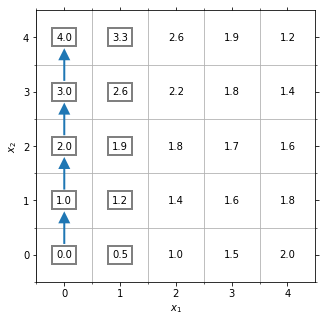

In [14]:
visualize_path(evaluated_xs, steps)

(4, 2) -> (4, 1)
(4, 1) -> (4, 0)
(4, 0) -> (4, 0)
(4, 0) -> (4, 0)
(4, 0) -> (4, 0)
(4, 0) -> (4, 0)


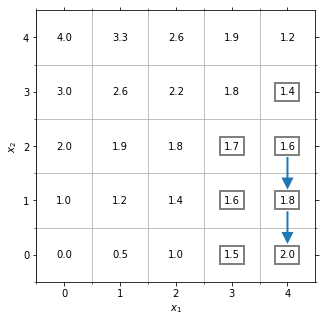

In [15]:
init_x = (4, 2)
init_f = f(init_x[0], init_x[1])
hc = HillClimbing(init_x, init_f)

evaluated_xs = {init_x}
steps = []

for _ in range(6):
  neighbor_xs = hc.get_neighbors()
  neighbor_fs = [f(x[0], x[1]) for x in neighbor_xs]
  step = hc.update(neighbor_xs, neighbor_fs)

  print('%s -> %s' % (step))
  steps.append(step)
  evaluated_xs.update(neighbor_xs)

visualize_path(evaluated_xs, steps)

# 乱択山登り法
全ての近傍解で評価するのではなく、ランダムな近傍解との評価を繰り返す

In [16]:
import random

class RandomizedHillClimbing:
  """乱択山登り法

  Args:
    init_x: 初期解
    init_f: 初期解の評価値

  Attributes:
    current_x: 現状解
    current_f: 現状解の評価値
  """
  def __init__(self, init_x, init_f):
    self.current_x = init_x
    self.current_f = init_f

  def get_neighbors(self):
    """近傍解を出力する。

    Returns:
      近傍解のリスト
    """
    neighbor_xs = []
    for i, xi in enumerate(self.current_x):
      neighbor_x = list(self.current_x)
      neighbor_x[i] += 1
      if is_valid(neighbor_x):
        neighbor_xs.append(tuple(neighbor_x))
      neighbor_x = list(self.current_x)
      neighbor_x[i] -= 1
      if is_valid(neighbor_x):
        neighbor_xs.append(tuple(neighbor_x))
    return neighbor_xs

  def get_neighbor(self):
    """ランダムに近傍解をひとつ選択する。

    Returns:
      近傍解
    """
    return random.choice(self.get_neighbors())

  def update(self, neighbor_x, neighbor_f):
    """良い近傍解があれば現状解を更新する。

    Args:
      neighbor_x: 評価済みの近傍解
      neighbor_f: 近傍解の評価値

    Returns:
      更新前の現状解と更新後の現状解のタプル
    """
    old_x = self.current_x
    if self.current_f < neighbor_f:
      self.current_x = neighbor_x
      self.current_f = neighbor_f
    return (old_x, self.current_x)

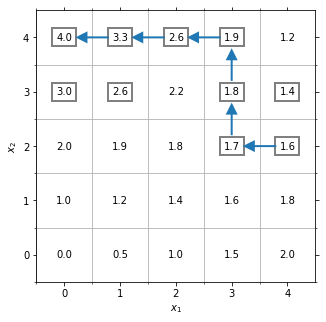

In [17]:
init_x = (4, 2)
init_f = f(init_x[0], init_x[1])
rhc = RandomizedHillClimbing(init_x, init_f)

evaluated_xs = {init_x}
steps = []

random.seed(0)
for _ in range(30):
  neighbor_x = rhc.get_neighbor()
  neighbor_f = f(neighbor_x[0], neighbor_x[1])
  step = rhc.update(neighbor_x, neighbor_f)

  steps.append(step)
  evaluated_xs.add(neighbor_x)
visualize_path(evaluated_xs, steps)

# 焼きなまし法
近傍解が現状解より劣っていたとしても、ある確率でその近傍解を受理  
劣った近傍解を受理する確率は「温度」パラメータによってコントロールされる  
温度が高いほど、現状解より劣る解を受理する確率は大きくなる  
  
updateするたびに冷却されて、劣った解を選ぶ可能性が低くなる

In [18]:
class SimulatedAnnealing:
  """焼なまし法

  Args:
    init_x: 初期解
    init_f: 初期解の評価値

  Attributes:
    current_x: 現状解
    current_f: 現状解の評価値
    temperature: 温度パラメータ
  """
  def __init__(self, init_x, init_f):
    self.current_x = init_x
    self.current_f = init_f
    self.temperature = 10

  def get_neighbors(self):
    """近傍解を出力する。

    Returns:
      近傍解のリスト
    """
    neighbor_xs = []
    for i, xi in enumerate(self.current_x):
      neighbor_x = list(self.current_x)
      neighbor_x[i] += 1
      if is_valid(neighbor_x):
        neighbor_xs.append(tuple(neighbor_x))
      neighbor_x = list(self.current_x)
      neighbor_x[i] -= 1
      if is_valid(neighbor_x):
        neighbor_xs.append(tuple(neighbor_x))
    return neighbor_xs

  def get_neighbor(self):
    """ランダムに近傍解をひとつ選択する。

    Returns:
      近傍解
    """
    return random.choice(self.get_neighbors())

  def accept_prob(self, f):
    """受理確率"""
    return np.exp((f - self.current_f) / max(self.temperature, 0.01))

  def update(self, neighbor_x, neighbor_f):
    """良い近傍解があれば現状解を更新する。

    Args:
      neighbor_x: 評価済みの近傍解
      neighbor_f: 近傍解の評価値

    Returns:
      更新前の現状解と更新後の現状解のタプル
    """
    old_x = self.current_x
    if random.random() < self.accept_prob(neighbor_f):
      self.current_x = neighbor_x
      self.current_f = neighbor_f
    self.temperature *= 0.8
    return (old_x, self.current_x)

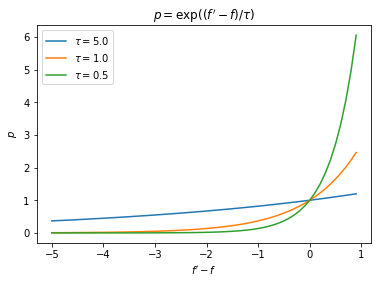

In [19]:
xs = np.arange(-5, 1, 0.1)
expf = lambda x, t: np.exp(x / t)
ts = [5, 1, 0.5]
for t in ts:
  plt.plot(xs, expf(xs, t), label=r'$\tau = %0.1f$' % t)
plt.title(r'$p = \exp((f^{\prime} - f) / \tau)$')
plt.xlabel(r'$f^{\prime} - f$')
plt.ylabel(r'$p$')
plt.legend()
plt.show()

受理関数はこんな感じで指数関数を用いて表現もできる


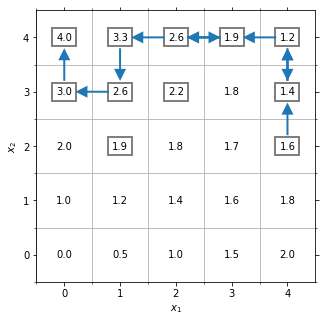

In [20]:
init_x = (4, 2)
init_f = f(init_x[0], init_x[1])
sa = SimulatedAnnealing(init_x, init_f)

evaluated_xs = {init_x}
steps = []

random.seed(0)
for _ in range(30):
  neighbor_x = sa.get_neighbor()
  evaluated_xs.add(neighbor_x)
  neighbor_f = f(neighbor_x[0], neighbor_x[1])
  step = sa.update(neighbor_x, neighbor_f)
  steps.append(step)

visualize_path(evaluated_xs, steps)

# 遺伝的アルゴリズム
淘汰、交叉、突然変異といった操作を実行  

1. ランダムにN個のかいを生成して、現世代の解集合とする
2. 評価関数を用いて、現世代の各解の評価値を求める
3. 評価値の大きい解を優先的に選択(淘汰操作)
4. 選択された解に交叉操作及び突然変異操作を施し、次世代の解集合に追加する
5. 終了条件を満たせば終了。満たさなければ次世代を現世代として２に戻る

In [35]:
np.random.seed(0)
N = 10
size = 8
solutions = [np.random.randint(0, 2, size=size * size // 2)
             for _ in range(N)]

In [36]:
print(solutions)

[array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0]), array([1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0]), array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0]), array([0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1]), array([1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1]), array([0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0]), array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1]), array([1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1]), array([1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1,

In [22]:
def represent(solution):
  return 1 - np.hstack((
      solution.reshape(size, size // 2),
      solution.reshape(size, size // 2)[:, ::-1]
  ))

In [23]:
def visualize(solutions):
  rows = 2
  cols = N // rows
  i = 0
  for row in range(rows):
    for col in range(cols):
      plt.subplot(rows, cols, i + 1)
      plt.imshow(represent(solutions[i]))
      plt.axis('off')
      plt.title(i)
      i += 1

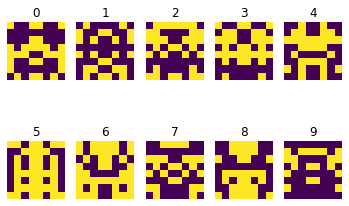

In [24]:
visualize(solutions)
plt.show()

In [37]:
# 交叉操作
def crossover(sol1, sol2):
  thres = np.random.randint(0, size * size // 2)
  new_solution = np.hstack((sol1[:thres], sol2[thres:]))
  return new_solution

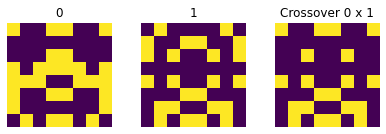

In [26]:
plt.subplot(1, 3, 1)
plt.imshow(represent(solutions[0]))
plt.title('0')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(represent(solutions[1]))
plt.title('1')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(represent(crossover(solutions[0], solutions[1])))
plt.title('Crossover 0 x 1')
plt.axis('off')
plt.tight_layout(pad=3)
plt.show()

In [38]:
# 突然変異
def mutation(solution):
  mut = np.random.randint(0, size * size // 2)
  new_solution = solution.copy()
  new_solution[mut] = (new_solution[mut] + 1) % 2
  return new_solution

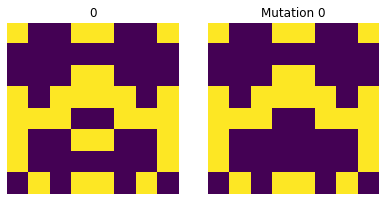

In [28]:
plt.subplot(1, 2, 1)
plt.imshow(represent(solutions[0]))
plt.title('0')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(represent(mutation(solutions[0])))
plt.title('Mutation 0')
plt.axis('off')
plt.tight_layout(pad=3)
plt.show()

In [29]:
def new_generation(parents, mut_n=3):
  solutions = []
  for _ in range(N):
    [i, j] = np.random.choice(range(len(parents)), 2, replace=False)
    child = crossover(parents[i], parents[j])
    solutions.append(child)

  for i in range(mut_n):
    solutions[i] = mutation(solutions[i])
  return solutions

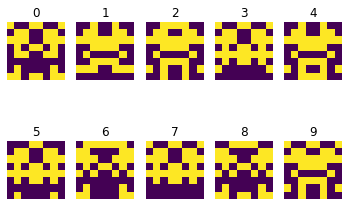

In [30]:
solutions = new_generation([
    solutions[2], solutions[3], solutions[4], solutions[9]])
visualize(solutions)
plt.show()

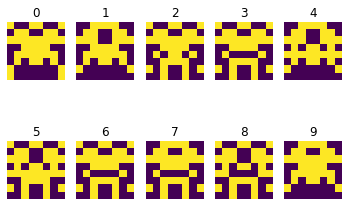

In [31]:
solutions = new_generation([
    solutions[2], solutions[3], solutions[9]])
visualize(solutions)
plt.show()

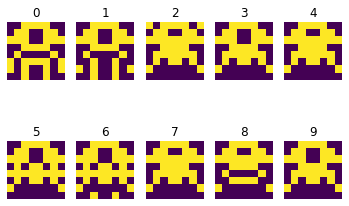

In [32]:
solutions = new_generation([
    solutions[1], solutions[4], solutions[7], solutions[9]])
visualize(solutions)
plt.show()

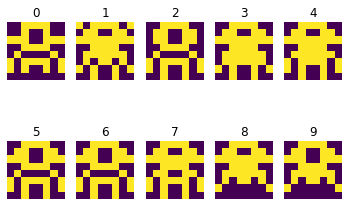

In [34]:
solutions = new_generation([solutions[0], solutions[7]])
visualize(solutions)
plt.show()